In [14]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [5]:
# read in the dataset
df_imputed = pd.read_csv('model_ready_data.csv')

In [6]:
# train test split
df_train, df_test = train_test_split(df_imputed,test_size=0.33, random_state=42)

In [7]:
# seperate predictor and target variabel
target_train = df_train['Survived'] 
target_test = df_test['Survived']
df_train=df_train.drop(["Survived"],axis=1)
df_test=df_test.drop(["Survived"],axis=1)

In [8]:
# create model object
clf = RandomForestClassifier(n_estimators=500,max_depth=20)
# fit model
clf.fit(df_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
#Get the prediction in probability
clf_probs = clf.predict_proba(df_test) 

In [12]:
# Calculate AUC
fpr_rt_lm, tpr_rt_lm, _ = metrics.roc_curve(target_test,clf_probs[:, 1])
metrics.auc(fpr_rt_lm, tpr_rt_lm)
#Run RUC and get AUC value

0.8628095238095238

0.8628095238095238

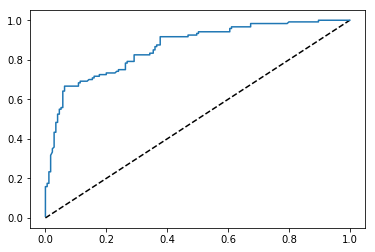

In [13]:
# plot AUC curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
metrics.auc(fpr_rt_lm, tpr_rt_lm)
#plot RUC